In [1]:
import os, h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import helper
from tfomics import utils, explain, metrics
import basset, dilated_residualbind2, dilated_residualbind
import logomaker
import pandas as pd
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# save path
results_path = utils.make_directory('../results', 'basset')
params_path = utils.make_directory(results_path, 'model_params')
save_path = utils.make_directory(results_path, 'conv_filters')

In [6]:
# load dataset
data_path = '../data/er.h5'
trainmat = h5py.File(data_path, 'r')
x_test = np.array(trainmat['test_in']).astype(np.float32)
y_test = np.array(trainmat['test_out']).astype(np.int32)
labels = np.array(trainmat['target_labels']).astype(str)
test_headers = np.array(trainmat['test_headers']).astype(str)
x_test = np.squeeze(x_test)
x_test = x_test.transpose([0,2,1])

In [15]:
trainmat['valid_out'].shape

(70000, 164)

In [13]:
len(x_test)

71886

In [10]:
indices = np.where(np.sum(y_test, axis=0) > 10000)[0]
indices

for i, name in enumerate(labels[indices]):
    print(indices[i],name)

4 Fibrobl
29 Osteobl
116 HMEC
117 HSMM
118 HSMMtube
121 LNCaP
124 Th1


In [9]:
for i, name in enumerate(labels):
    if 'H1-hESC' in name:
        print(i)

113


In [ ]:
test = 'TATAAATATTAGTTGAATGGTATGAAGTAAAACAAActtatactggtaatagctttggaatttacaaagcattttcccatgcattatgtcttctcctcctcatattaaccctgcaaacgaaataacattattacccgtactttacagaagaggacactgaagccaaaggagaaaattaactagctcagtcttgcatgacccctgtgaatggactgatcttgaaacccaggtaaccttactccCTGGTCCCAGCCTTTGTTAATGGGGACACAATCCTGGAAATTTTGCCTGTGTGTAAACCTCTAGGGGCTTTTTCTTTCATCGTTTTACATCAGCCAGACTCTGACTCACAGCTGGAGAATCAGCTTCCTTATTATGTAGCGAATTCCATGAACACACACCAAGAGTTGTTTTCTGTAACAGGCTGAAGTAGCTTCTTCTCCCAGTCTCTTTCTCCCATCAAAATTAGAATATCTTTCCTTGGAAAACTGTGCCCAGGTTGAGGGGGACTTCTCCCTGGTTTTGTGTAGACTCTTTGATATGCTCCAAACTCAACGCCTTTCCTTCAATCCCTGGGGCCTTAGGAACAGCCAACCCACA'

L = len(test)
alphabet = 'ACGT'
X = np.zeros((1,L,4))
for l,a in enumerate(test.upper()):
    X[0,l,alphabet.index(a)] = 1

In [ ]:
model_name = 'basset'
activation = 'relu'

class_index = 113
name = model_name+'_'+activation
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores = explain.saliency(model, X, class_index=class_index, layer=-1)
scores *= X

In [ ]:
model_name = 'basset'
activation = 'exponential'

name = model_name+'_'+activation+'_balance'
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores2 = explain.saliency(model, X, class_index=class_index, layer=-1)
scores2 *= X

In [4]:
plot_range = range(150,430)
N, L, A = scores.shape
L = len(plot_range)
for k, i in enumerate(range(len(scores))):

    fig = plt.figure(figsize=(25,4))

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i,plot_range[l],a]

    ax = plt.subplot(2,1,1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Relu', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores2[i,plot_range[l],a]

    ax = plt.subplot(2,1,2)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Exp', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])


    outfile = os.path.join(results_path, 'basset_compare.pdf')
    fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


NameError: name 'scores' is not defined

In [3]:
# load dataset
data_path = '../data/er.h5'
trainmat = h5py.File(data_path, 'r')
x_test = np.array(trainmat['test_in']).astype(np.float32)
y_test = np.array(trainmat['test_out']).astype(np.int32)

x_test = np.squeeze(x_test)
x_test = x_test.transpose([0,2,1])


In [11]:
indices = np.where(np.sum(y_test, axis=0) > 10000)[0]
indices

array([  4,  29, 116, 117, 118, 121, 124])

In [5]:
from keras import backend as K
import tensorflow.compat.v1.keras.backend as K1
class_index = 4
index = np.where((y_test[:,class_index] == 1)&(np.sum(np.sum(x_test == .25, axis=2), axis=1) == 0) &(np.sum(y_test,axis=1)== 1))[0]
print(len(index))

185


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



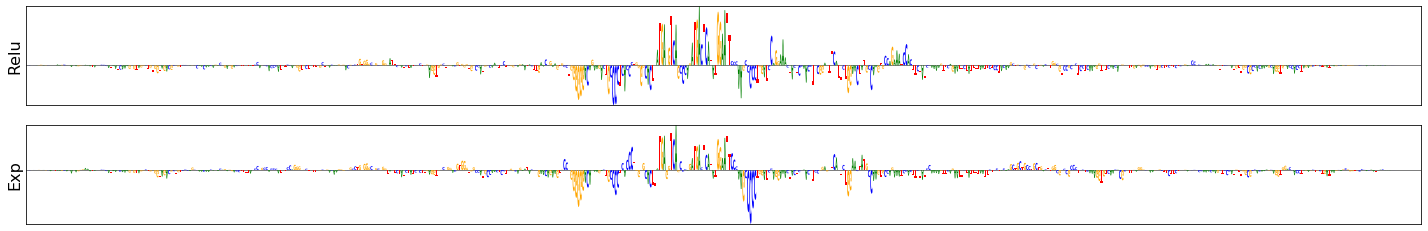

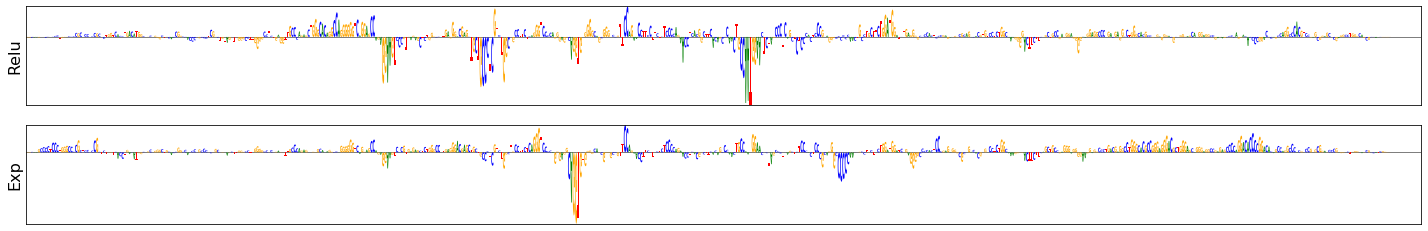

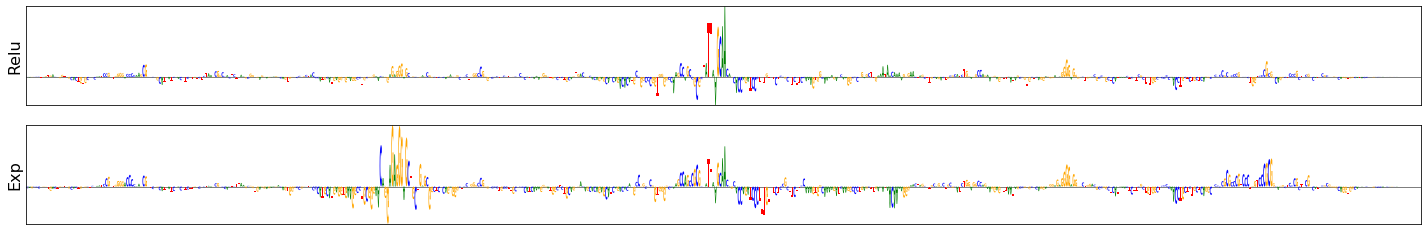

In [6]:
class_index = 4
index = [30, 227, 320]
X = x_test[index]

model_name = 'basset'
activation = 'relu'

name = model_name+'_'+activation+'_balance'
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores = explain.saliency(model, X, class_index=class_index, layer=-1)
scores *= X

model_name = 'basset'
activation = 'exponential'

name = model_name+'_'+activation+'_balance'
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores2 = explain.saliency(model, X, class_index=class_index, layer=-1)
scores2 *= X


plot_range = range(0,600)
N, L, A = scores.shape
L = len(plot_range)
for k, i in enumerate(range(len(scores))):

    fig = plt.figure(figsize=(25,4))

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i,plot_range[l],a]

    ax = plt.subplot(2,1,1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Relu', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])
    # plt.title([k, index[i]], fontsize=16)

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores2[i,plot_range[l],a]

    ax = plt.subplot(2,1,2)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Exp', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])

    outfile = os.path.join(results_path, str(class_index)+'_'+str(i)+'.pdf')
    fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')




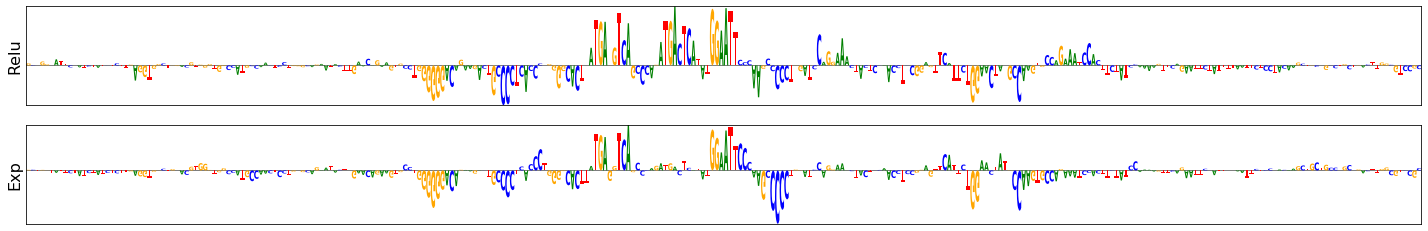

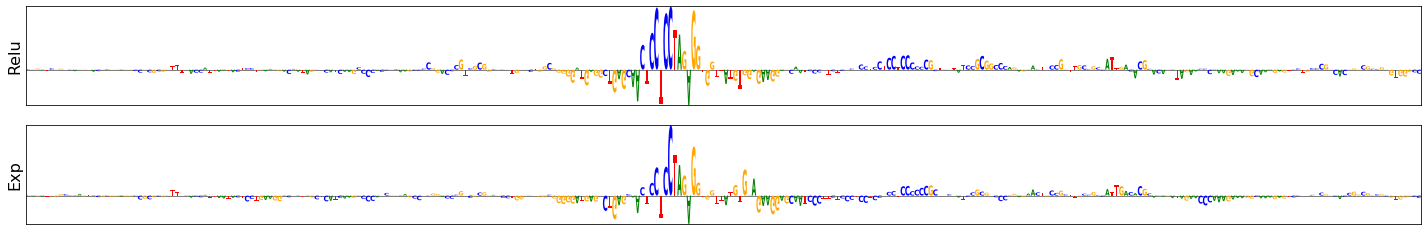

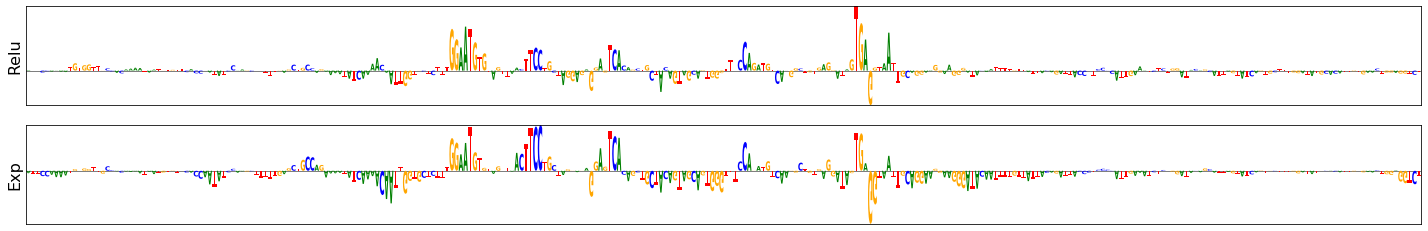

In [10]:
class_index = 117
index = [30, 221, 255]
X = x_test[index]

model_name = 'basset'
activation = 'relu'

name = model_name+'_'+activation+'_balance'
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores = explain.saliency(model, X, class_index=class_index, layer=-1)
scores *= X

model_name = 'basset'
activation = 'exponential'

name = model_name+'_'+activation+'_balance'
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores2 = explain.saliency(model, X, class_index=class_index, layer=-1)
scores2 *= X


plot_range = range(150,450)
N, L, A = scores.shape
L = len(plot_range)
for k, i in enumerate(range(len(scores))):

    fig = plt.figure(figsize=(25,4))

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i,plot_range[l],a]

    ax = plt.subplot(2,1,1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Relu', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])
    # plt.title([k, index[i]], fontsize=16)

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores2[i,plot_range[l],a]

    ax = plt.subplot(2,1,2)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Exp', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])

    outfile = os.path.join(results_path, str(class_index)+'_'+str(i)+'.pdf')
    fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')




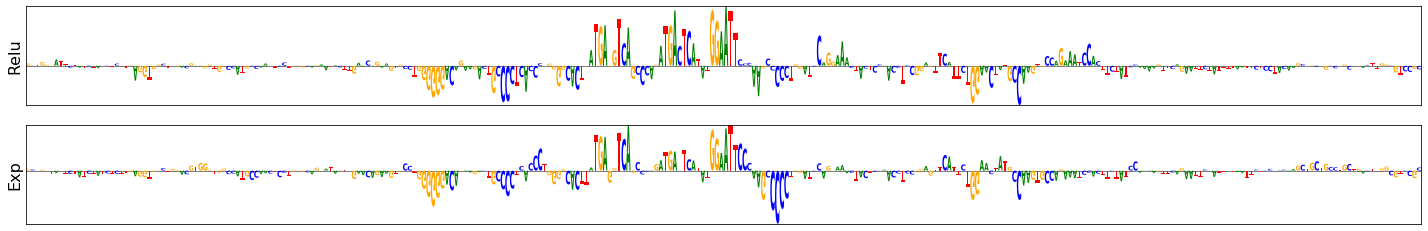

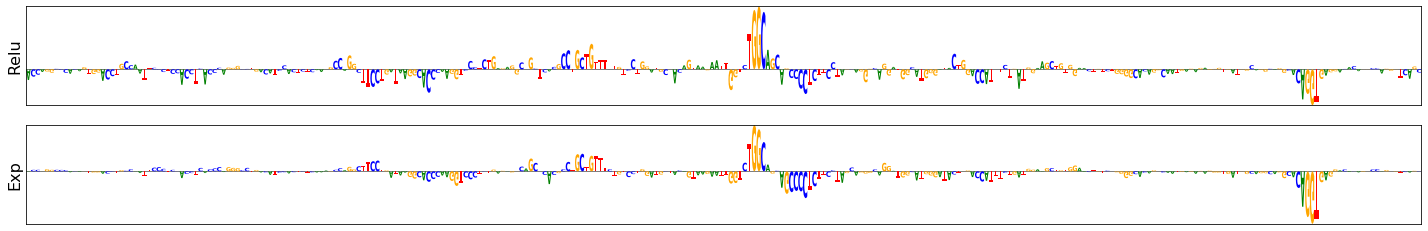

In [11]:
class_index = 118
index = [30, 321]
X = x_test[index]

model_name = 'basset'
activation = 'relu'

name = model_name+'_'+activation+'_balance'
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores = explain.saliency(model, X, class_index=class_index, layer=-1)
scores *= X

model_name = 'basset'
activation = 'exponential'

name = model_name+'_'+activation+'_balance'
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores2 = explain.saliency(model, X, class_index=class_index, layer=-1)
scores2 *= X


plot_range = range(150,450)
N, L, A = scores.shape
L = len(plot_range)
for k, i in enumerate(range(len(scores))):

    fig = plt.figure(figsize=(25,4))

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i,plot_range[l],a]

    ax = plt.subplot(2,1,1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Relu', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])
    # plt.title([k, index[i]], fontsize=16)

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores2[i,plot_range[l],a]

    ax = plt.subplot(2,1,2)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Exp', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])

    outfile = os.path.join(results_path, str(class_index)+'_'+str(i)+'.pdf')
    fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')




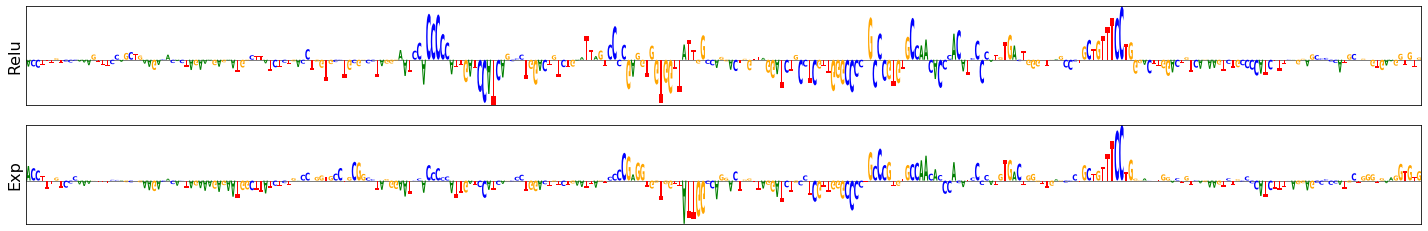

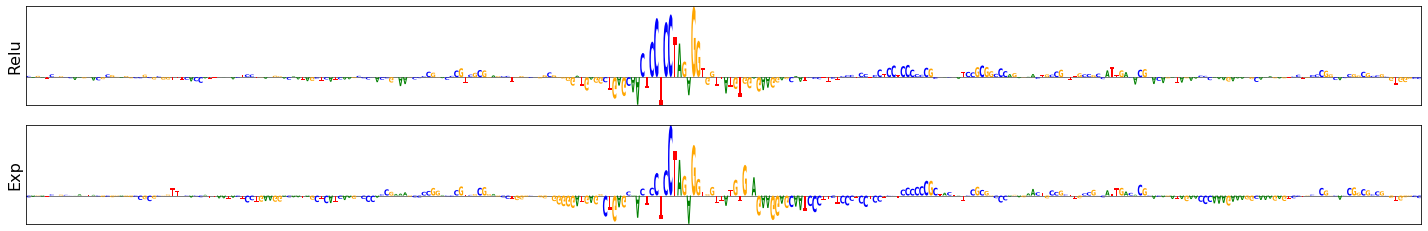

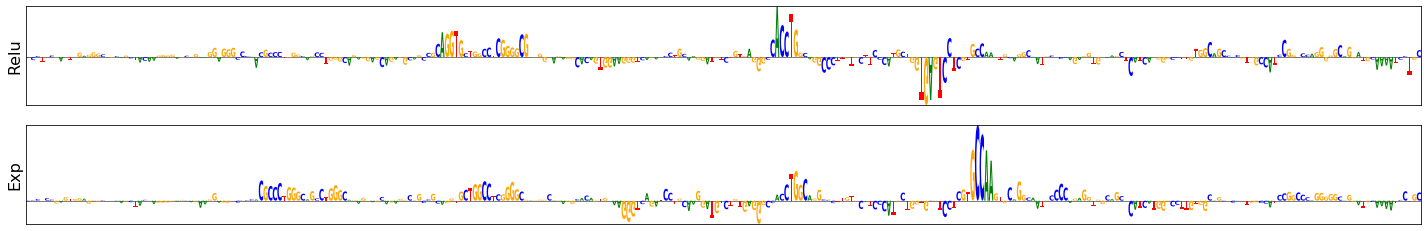

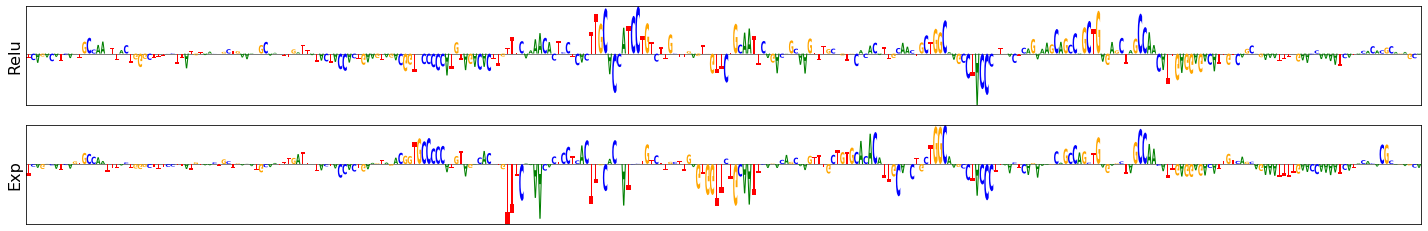

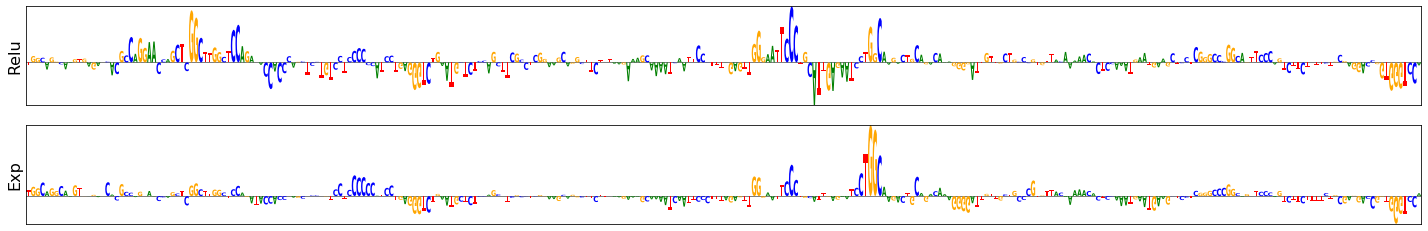

In [12]:
class_index = 121
index = [47, 221, 788, 683, 271]
X = x_test[index]

model_name = 'basset'
activation = 'relu'

name = model_name+'_'+activation+'_balance'
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores = explain.saliency(model, X, class_index=class_index, layer=-1)
scores *= X

model_name = 'basset'
activation = 'exponential'

name = model_name+'_'+activation+'_balance'
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores2 = explain.saliency(model, X, class_index=class_index, layer=-1)
scores2 *= X


plot_range = range(150,450)
N, L, A = scores.shape
L = len(plot_range)
for k, i in enumerate(range(len(scores))):

    fig = plt.figure(figsize=(25,4))

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i,plot_range[l],a]

    ax = plt.subplot(2,1,1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Relu', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])
    # plt.title([k, index[i]], fontsize=16)

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores2[i,plot_range[l],a]

    ax = plt.subplot(2,1,2)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Exp', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])

    outfile = os.path.join(results_path, str(class_index)+'_'+str(i)+'.pdf')
    fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')




In [12]:
#X = x_test[index[50:100]]
X = x_test[index[:50]]
#X = x_test[index[50:100]]


In [196]:
index = [30, 227, 320]
#index = [30, 221, 255]
#index = [47, 221, 788, 683]
X = x_test[index]

In [ ]:
plot_range = range(0,600)
N, L, A = scores.shape
L = len(plot_range)

fig = plt.figure(figsize=(25,20))

i=33

ax = plt.subplot(12,1,1)
counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
for a in range(A):
    for l in range(L):
        counts_df.iloc[l,a] = scores[i,plot_range[l],a]

logomaker.Logo(counts_df, ax=ax)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
#plt.ylabel(index[i], fontsize=18)

outfile = os.path.join(results_path, 'basset_relu_example2.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


In [13]:
model_name = 'basset'
activation = 'relu'

name = model_name+'_'+activation
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores = explain.saliency(model, X, class_index=class_index, layer=-1)
scores *= X

In [14]:
model_name = 'basset'
activation = 'exponential'

name = model_name+'_'+activation+'_balance'
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores2 = explain.saliency(model, X, class_index=class_index, layer=-1)
scores2 *= X

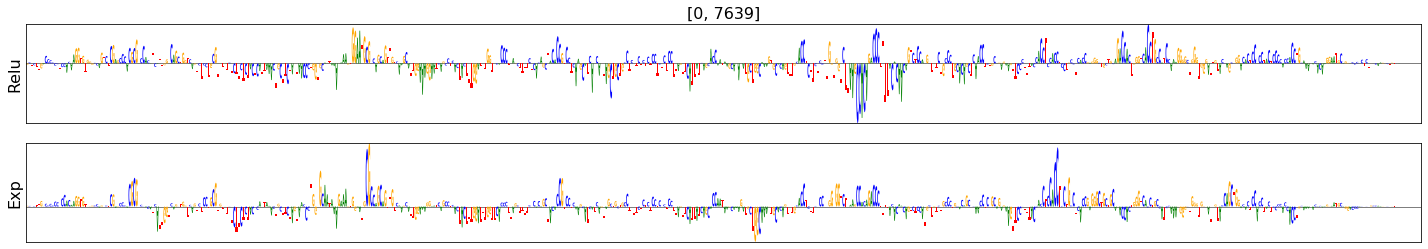

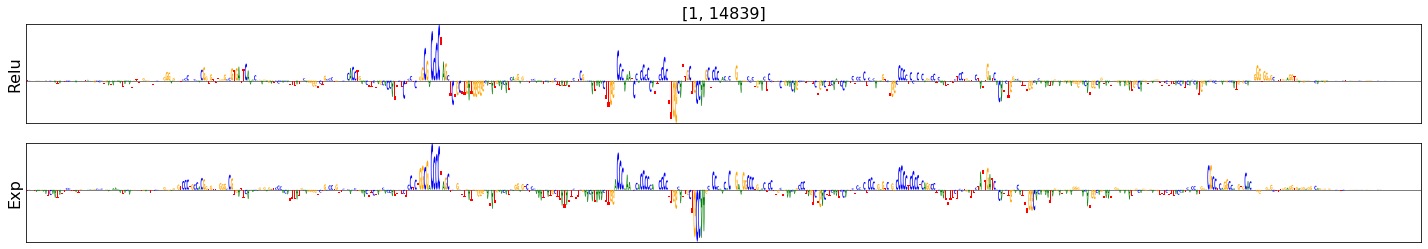

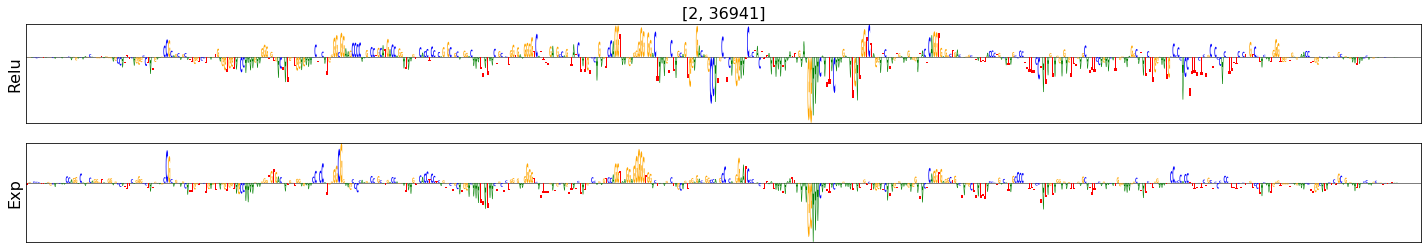

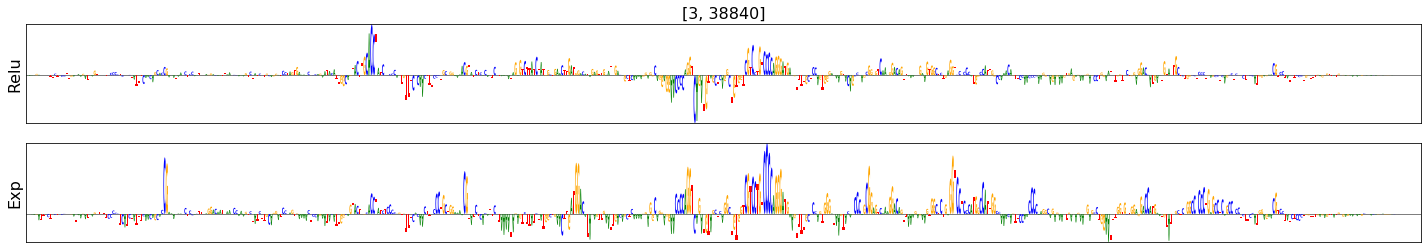

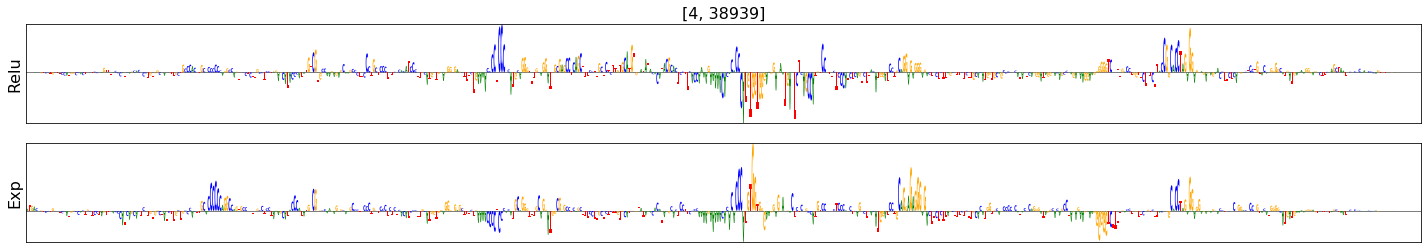

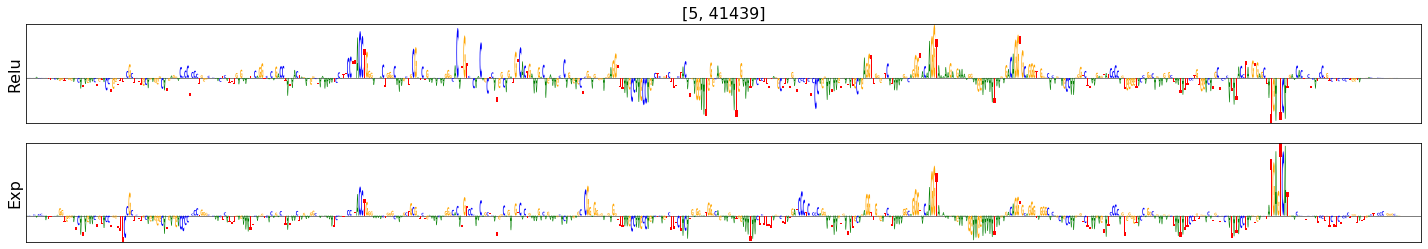

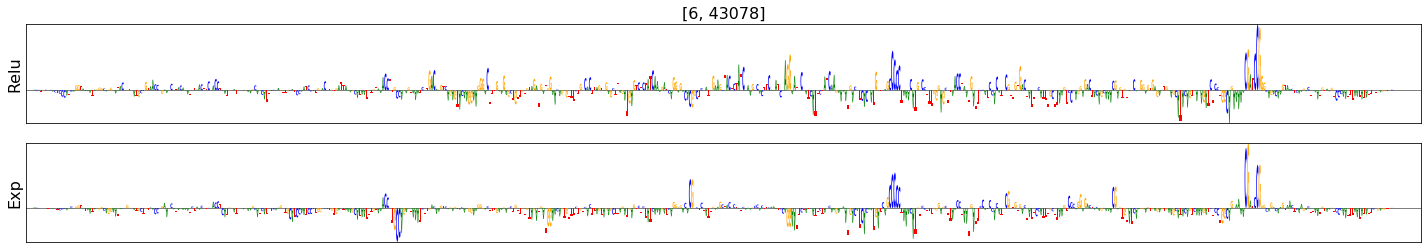

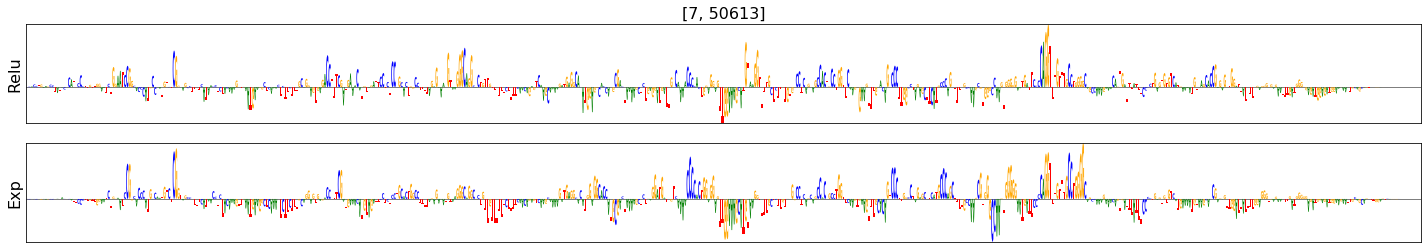

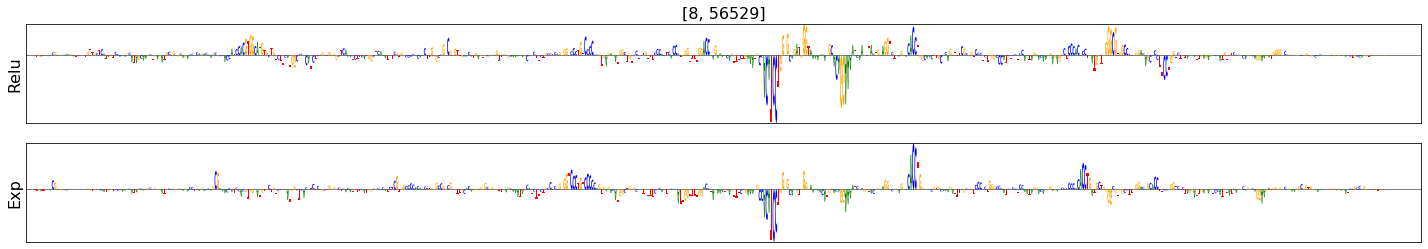

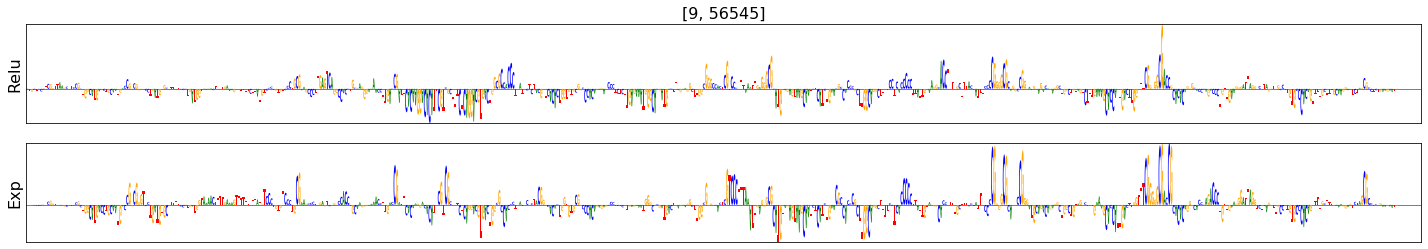

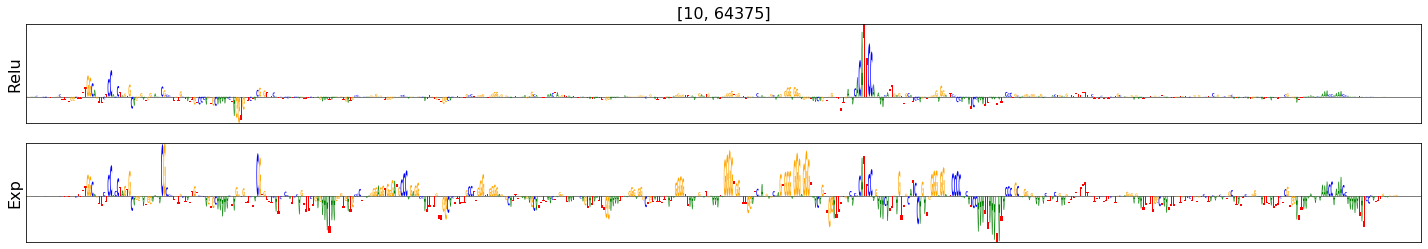

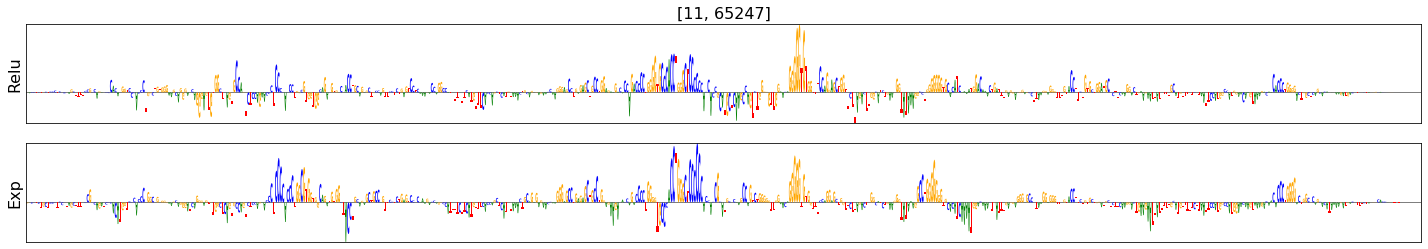

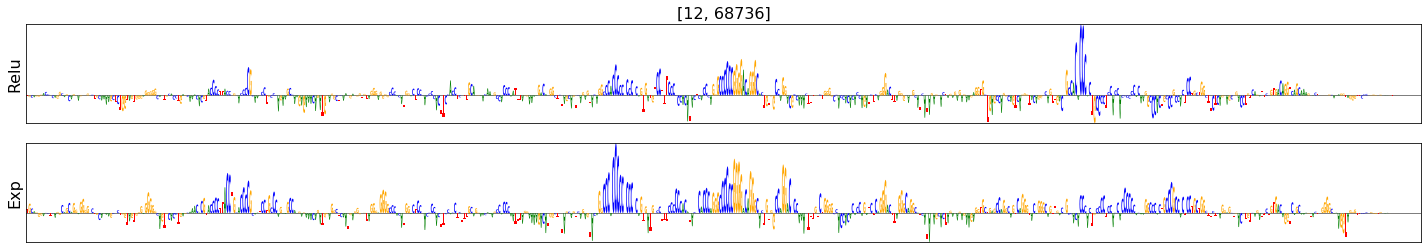

In [15]:
plot_range = range(0,600)
N, L, A = scores.shape
L = len(plot_range)
for k, i in enumerate(range(len(scores))):

    fig = plt.figure(figsize=(25,4))

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i,plot_range[l],a]

    ax = plt.subplot(2,1,1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Relu', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])
    plt.title([k, index[i]], fontsize=16)

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores2[i,plot_range[l],a]

    ax = plt.subplot(2,1,2)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Exp', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])



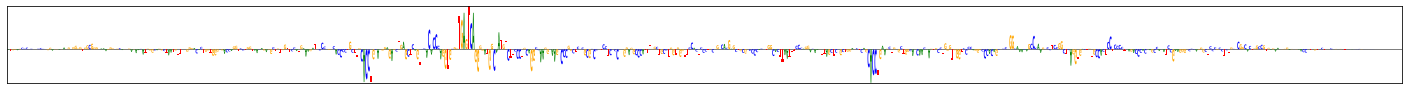

In [189]:
plot_range = range(0,600)
N, L, A = scores.shape
L = len(plot_range)

fig = plt.figure(figsize=(25,20))

i=33

ax = plt.subplot(12,1,1)
counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
for a in range(A):
    for l in range(L):
        counts_df.iloc[l,a] = scores[i,plot_range[l],a]

logomaker.Logo(counts_df, ax=ax)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
#plt.ylabel(index[i], fontsize=18)

outfile = os.path.join(results_path, 'basset_relu_example2.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')



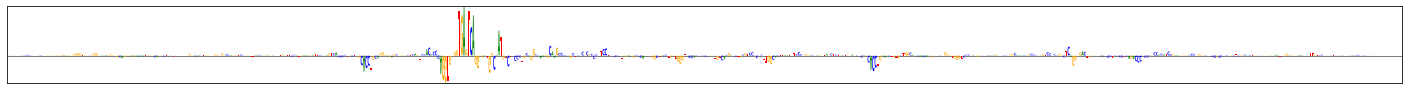

In [190]:
fig = plt.figure(figsize=(25,20))

ax = plt.subplot(12,1,1)
counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
for a in range(A):
    for l in range(L):
        counts_df.iloc[l,a] = scores2[i,plot_range[l],a]

logomaker.Logo(counts_df, ax=ax)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
#plt.ylabel(index[i], fontsize=18)

outfile = os.path.join(results_path, 'basset_exp_example2.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')



# plot 

In [14]:
index[i]

935

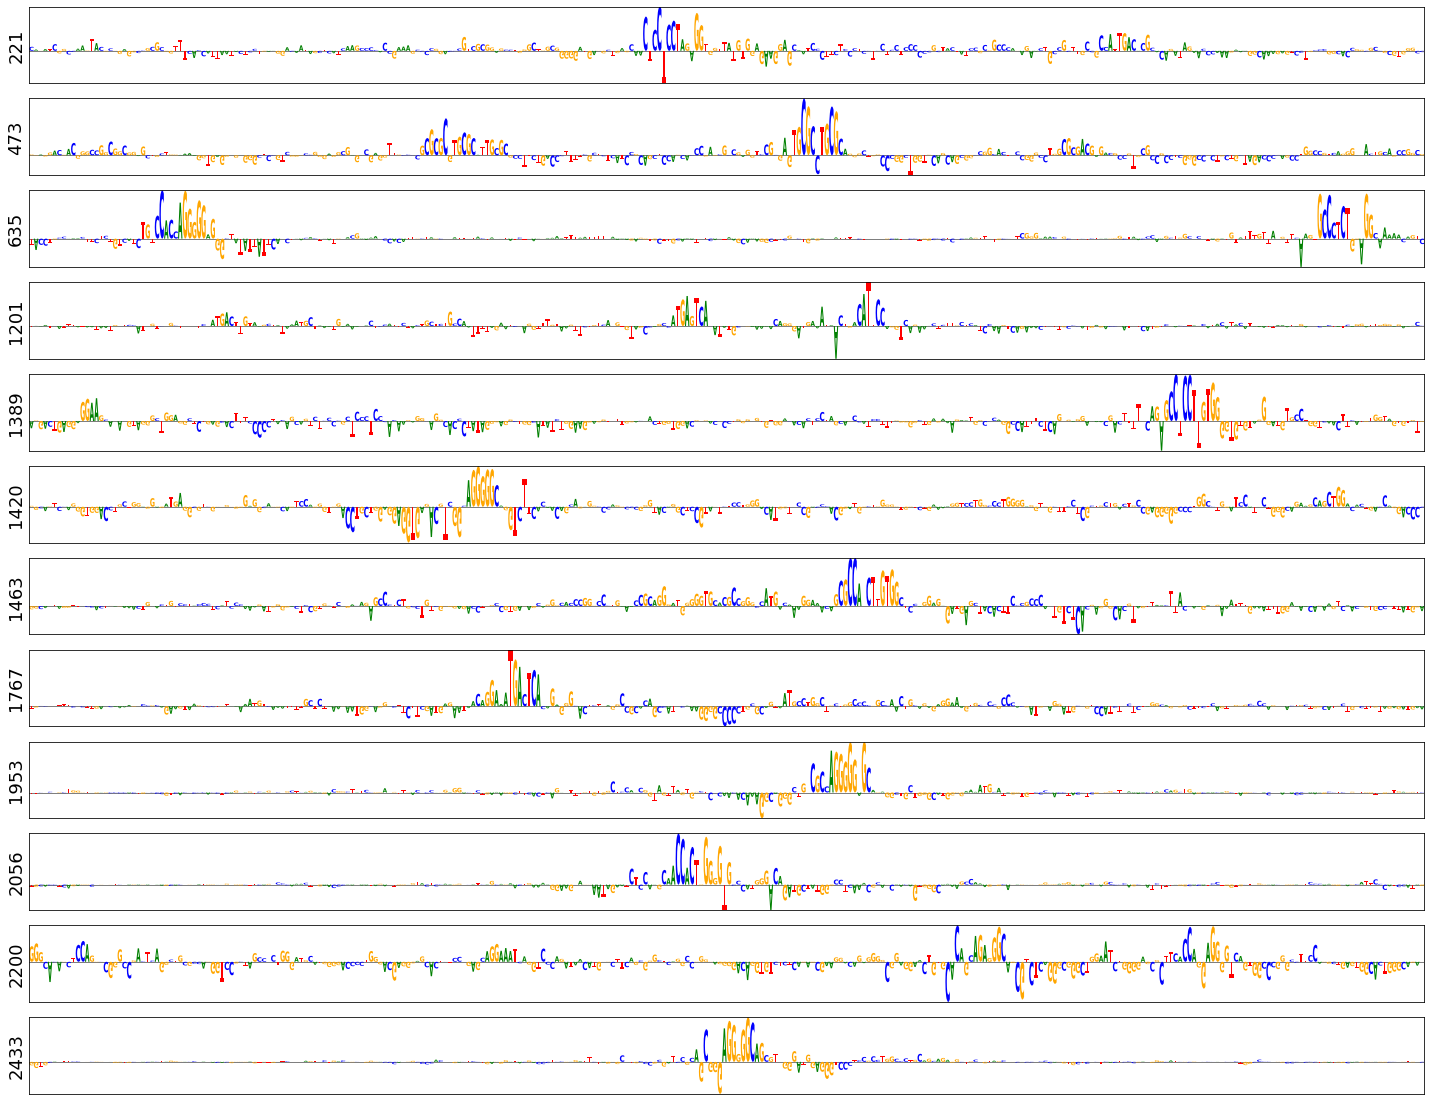

In [154]:
plot_range = range(150,450)
N, L, A = scores.shape
L = len(plot_range)

fig = plt.figure(figsize=(25,20))


for i in range(len(scores)):


    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i,plot_range[l],a]

    ax = plt.subplot(len(scores),1,i+1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel(index[i], fontsize=18)

outfile = os.path.join(results_path, 'basset_relu.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


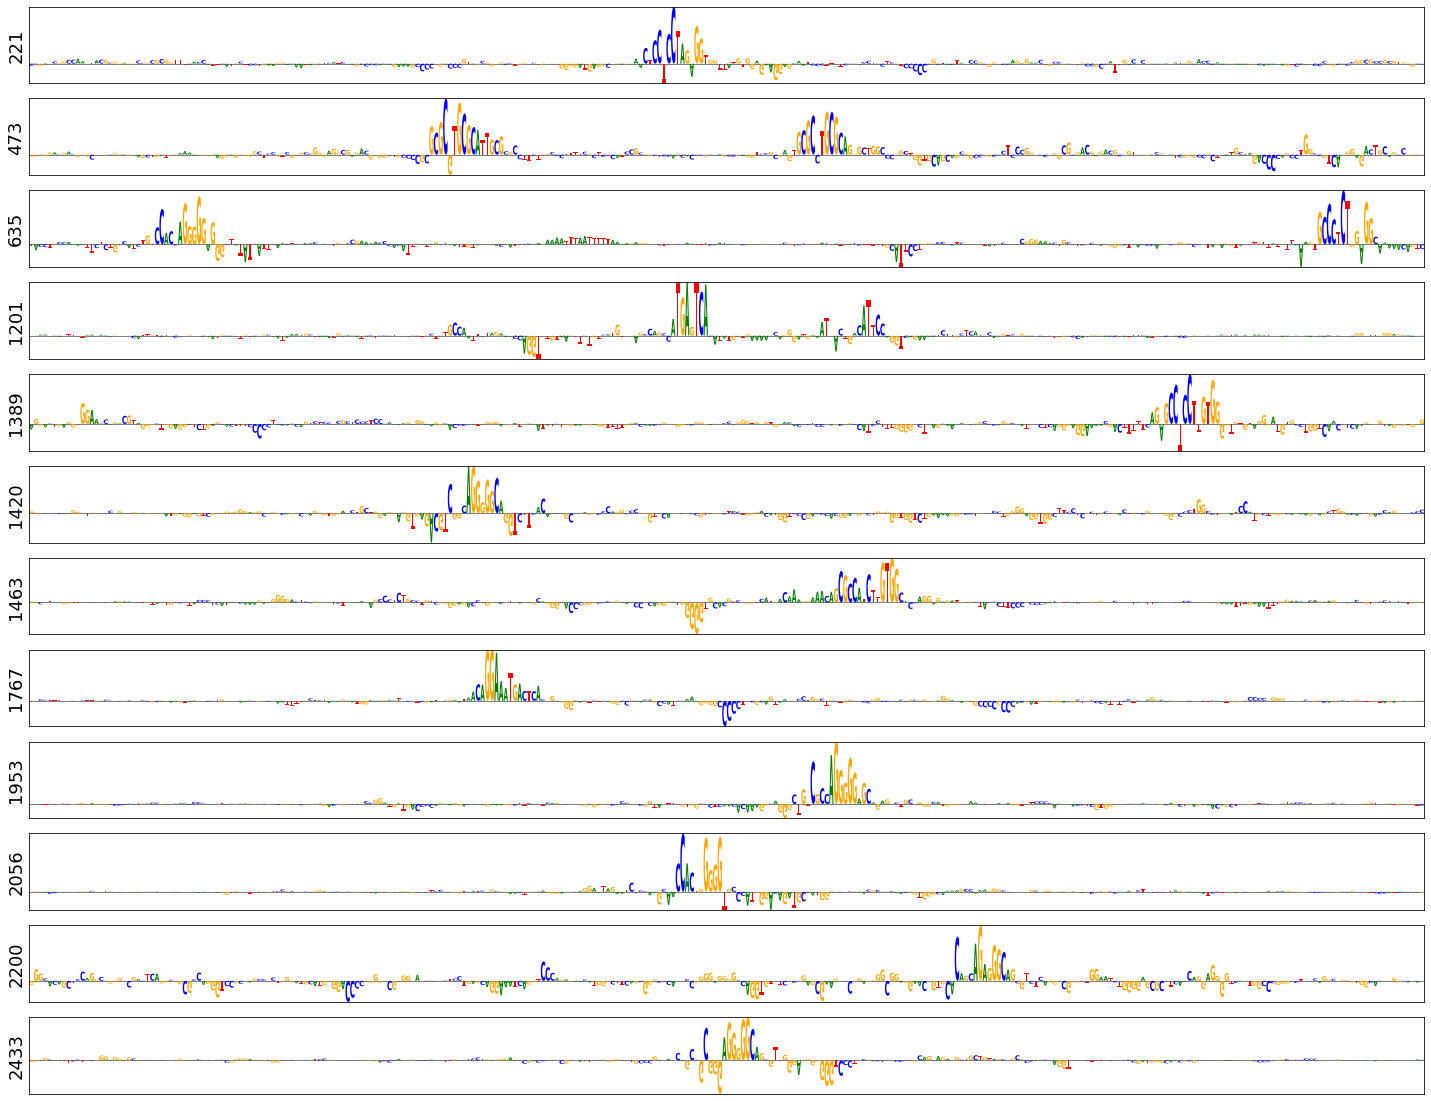

In [153]:
plot_range = range(150,450)
N, L, A = scores.shape
L = len(plot_range)

fig = plt.figure(figsize=(25,20))


for i in range(len(scores)):


    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores2[i,plot_range[l],a]

    ax = plt.subplot(len(scores),1,i+1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel(index[i], fontsize=18)


outfile = os.path.join(results_path, 'basset_exp.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


# individual plots

(12, 600, 4)

In [15]:
scores.shape

(12, 600, 4)

In [13]:
scores[i,plot_range[l],a]

IndexError: range object index out of range

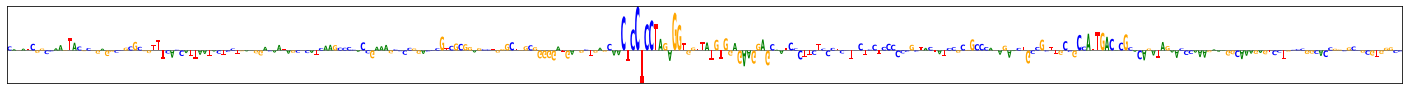

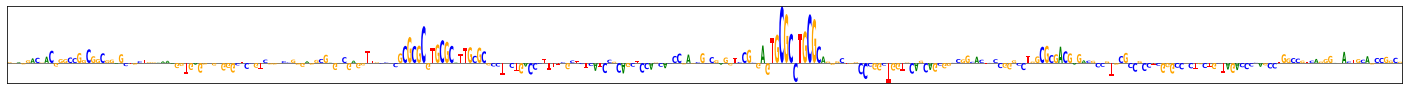

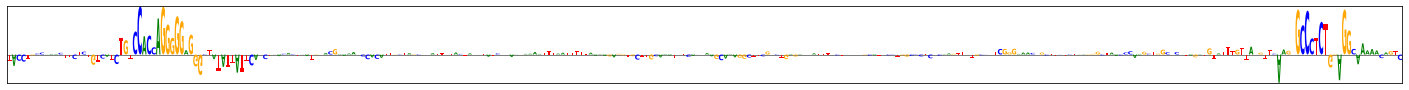

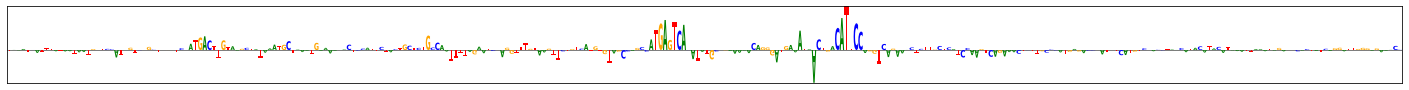

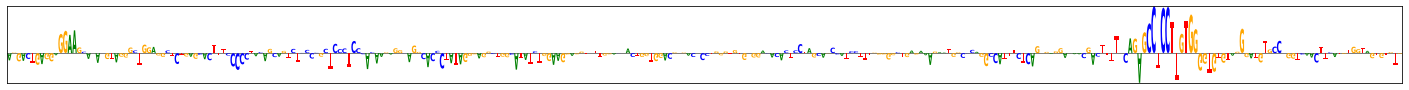

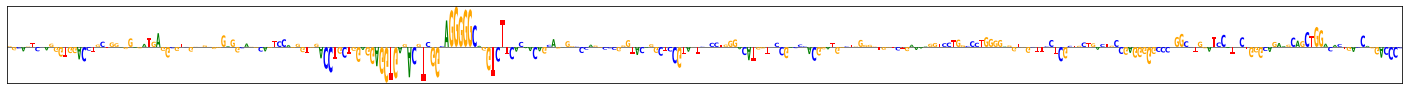

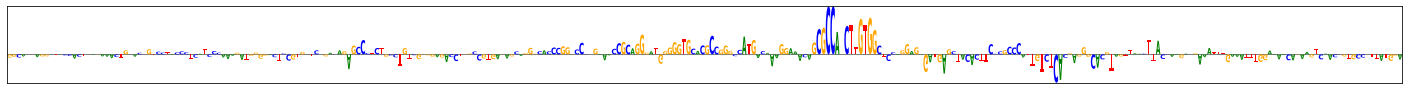

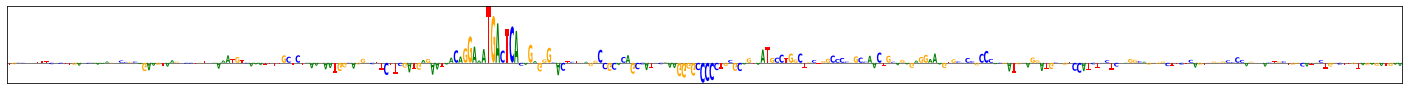

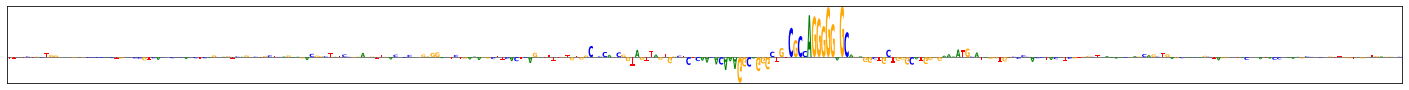

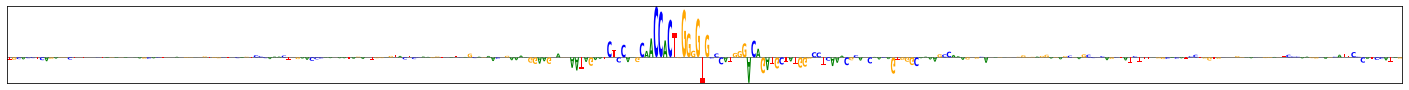

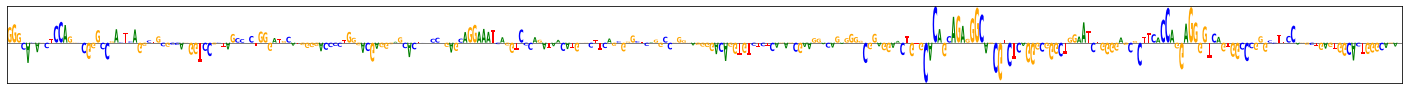

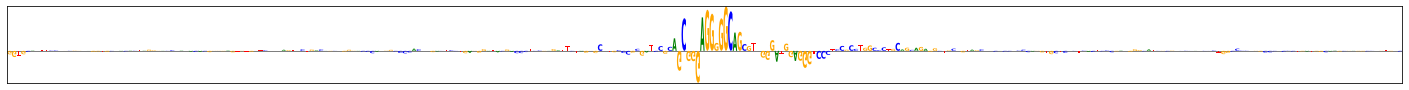

In [24]:
plot_range = range(150,450)

N, L, A = scores.shape
L = len(plot_range)
for i in range(len(scores)):

    fig = plt.figure(figsize=(25,20))
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i,plot_range[l],a]

    ax = plt.subplot(len(scores),1,i+1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    #plt.ylabel(index[i], fontsize=18)

    outfile = os.path.join(results_path, 'basset_relu_'+str(i)+'.pdf')
    fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


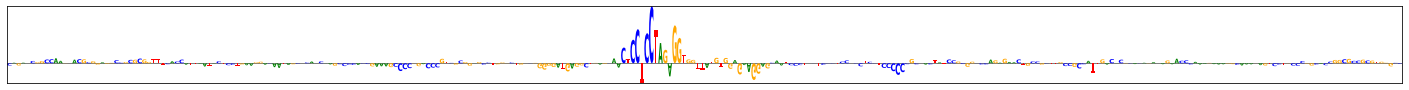

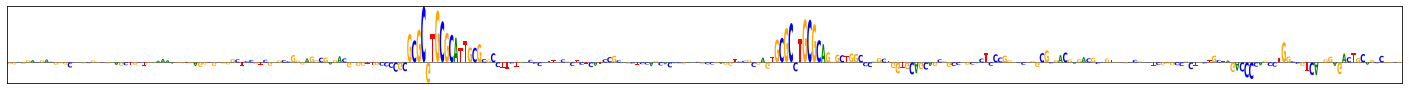

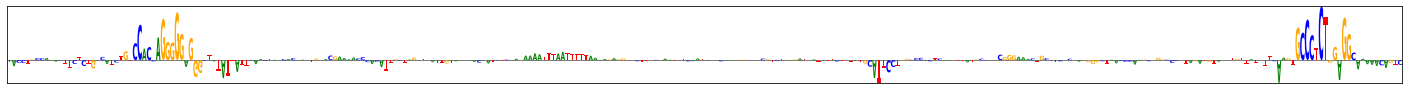

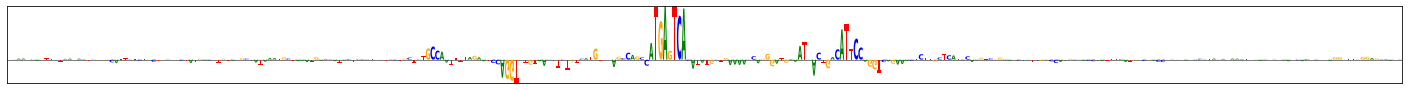

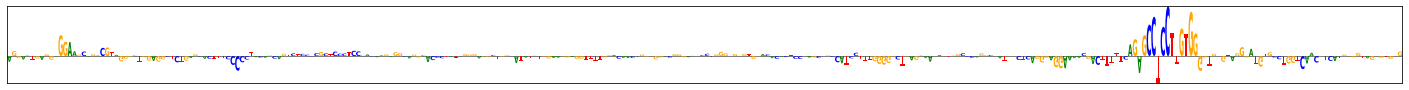

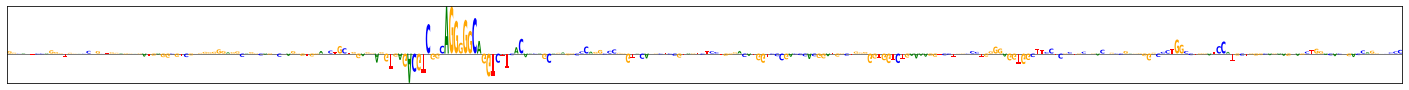

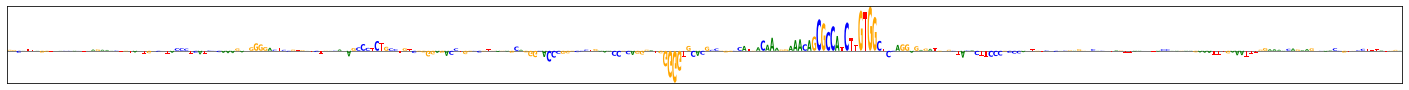

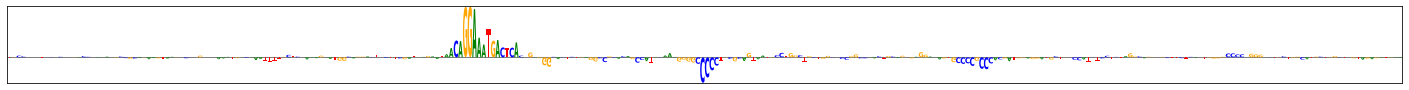

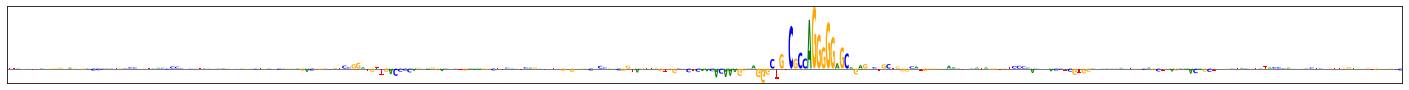

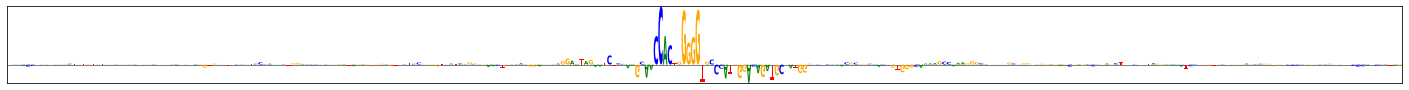

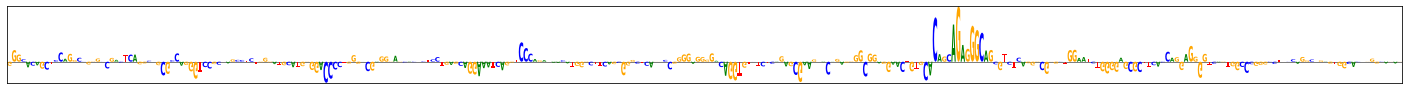

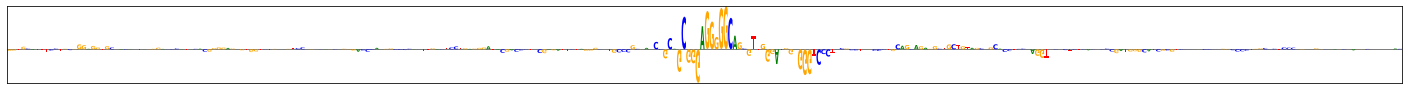

In [8]:
plot_range = range(150,450)

N, L, A = scores.shape
L = len(plot_range)


for i in range(len(scores2)):

    fig = plt.figure(figsize=(25,20))
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores2[i,plot_range[l],a]

    ax = plt.subplot(len(scores2),1,i+1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    #plt.ylabel(index[i], fontsize=18)

    outfile = os.path.join(results_path, 'basset_exp_'+str(i)+'.pdf')
    fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


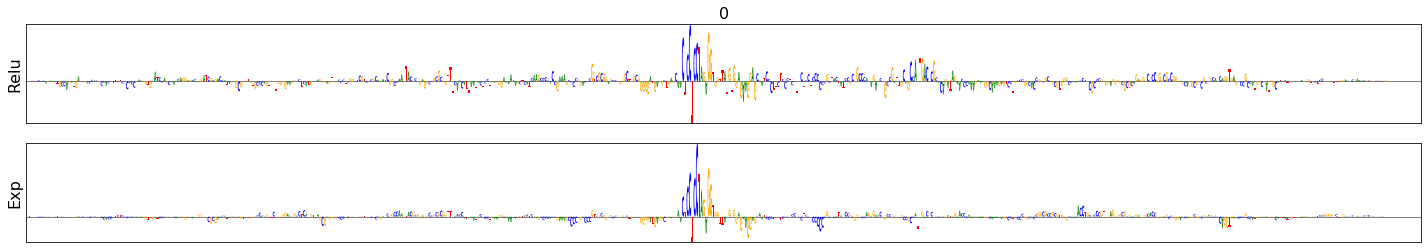

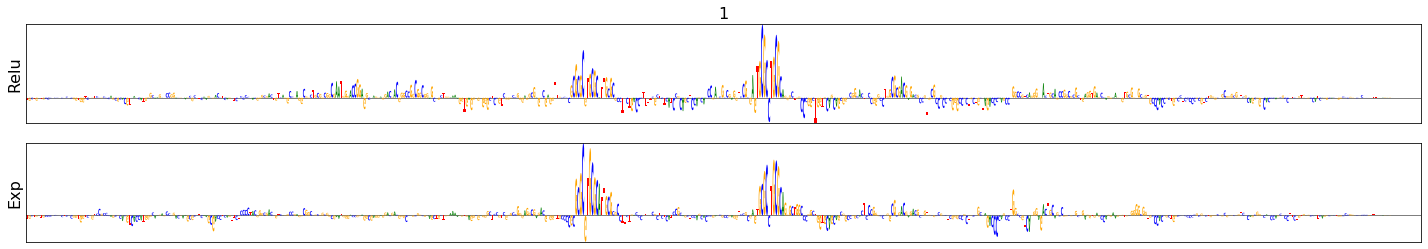

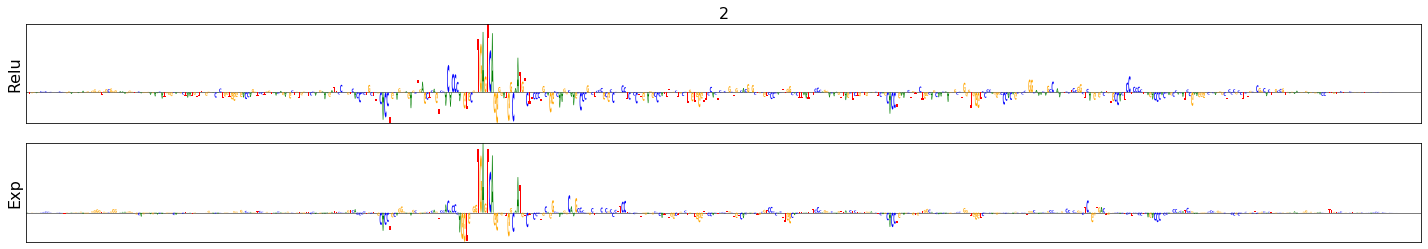

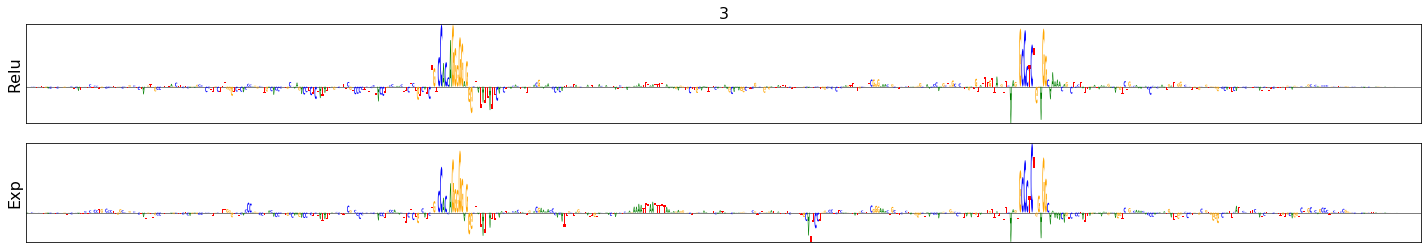

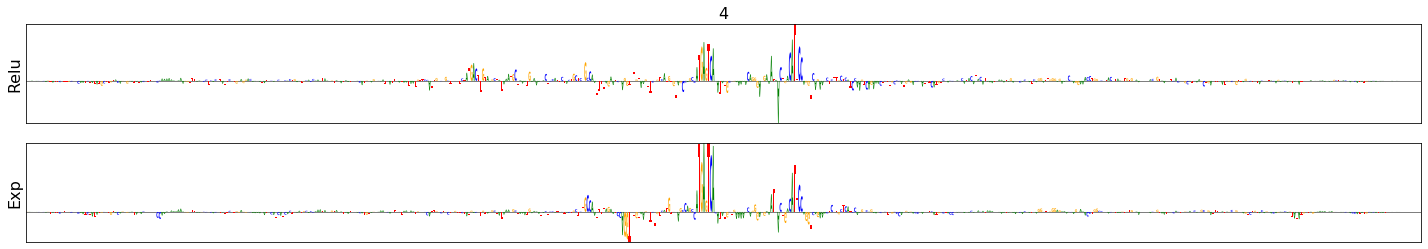

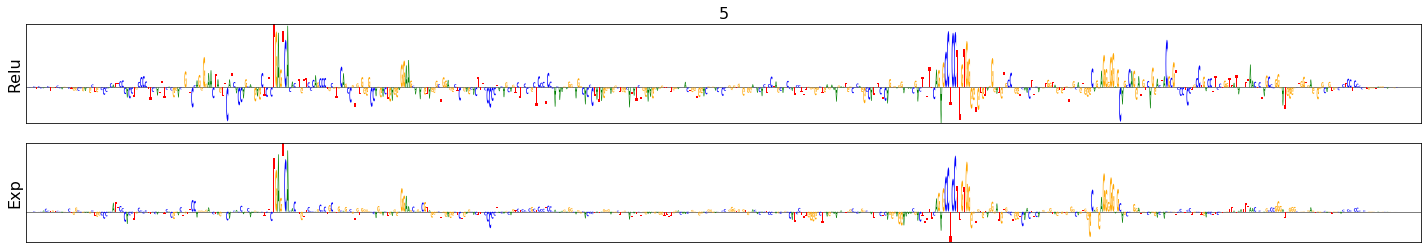

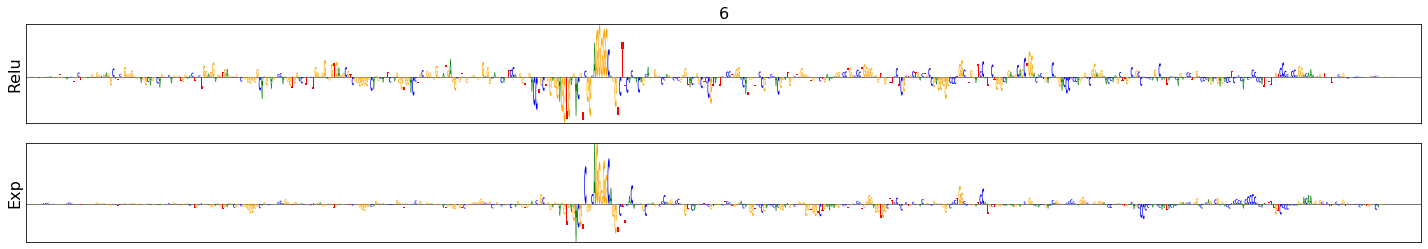

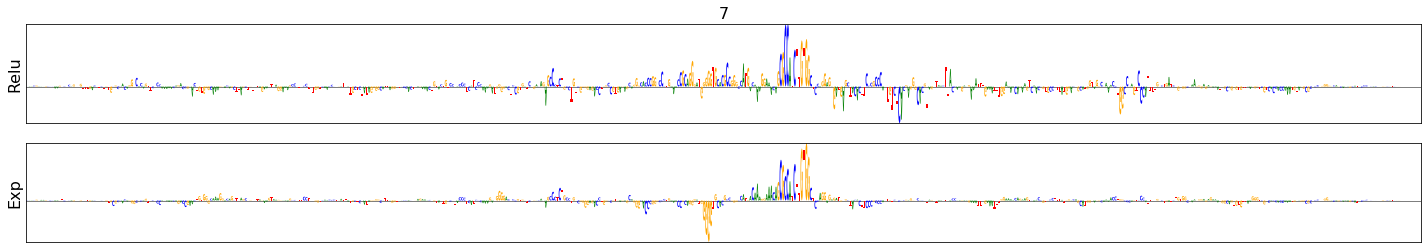

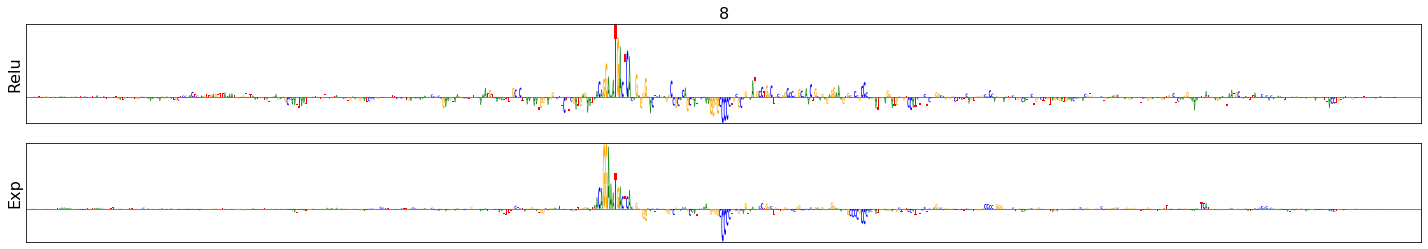

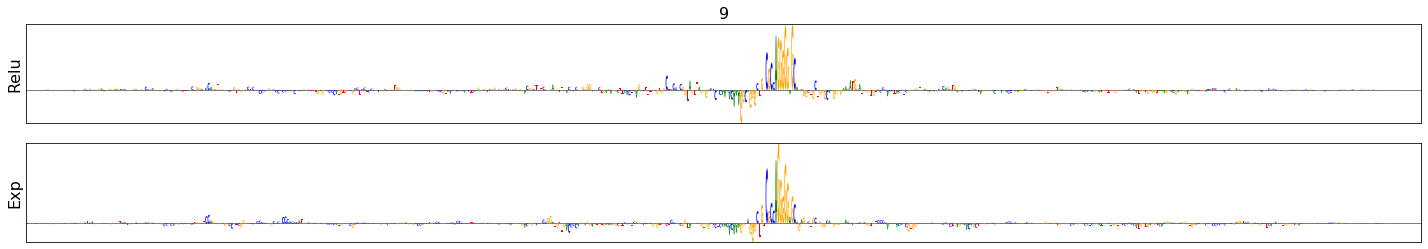

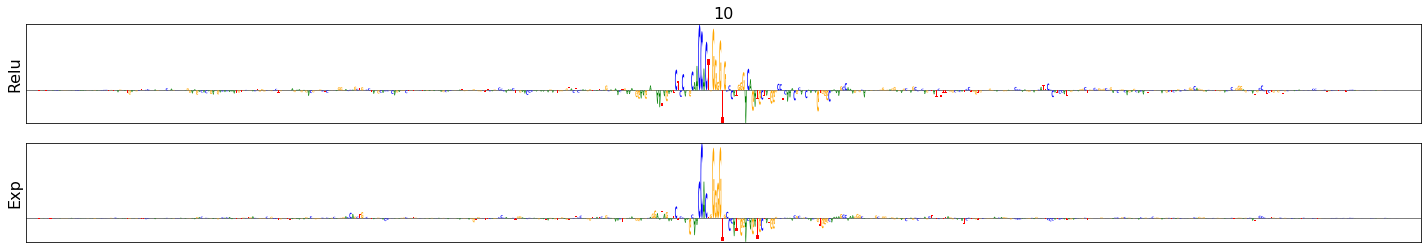

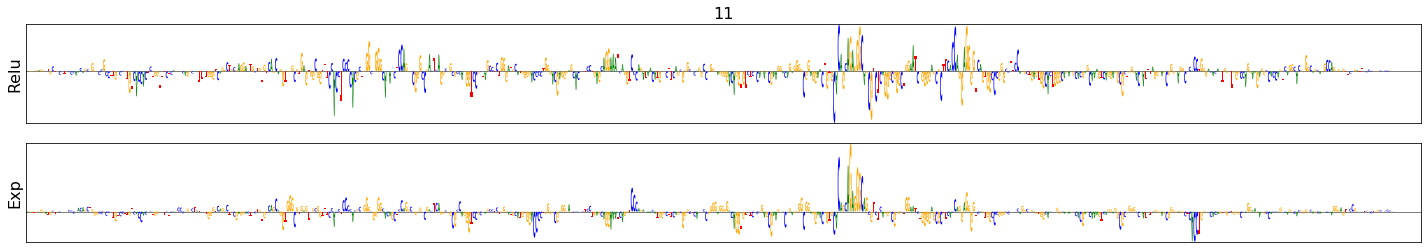

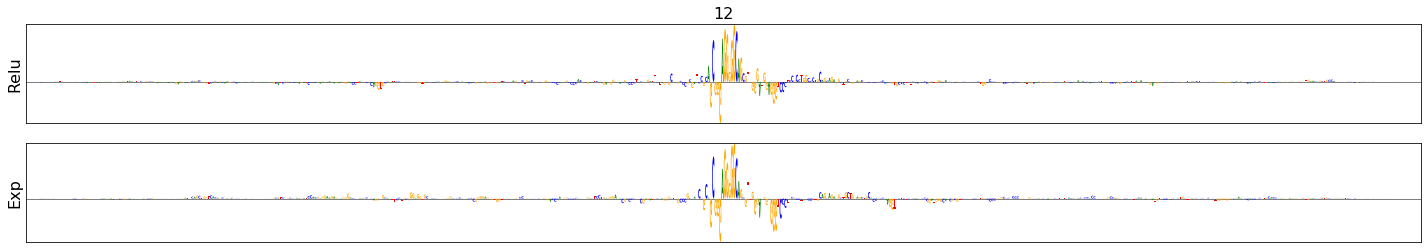

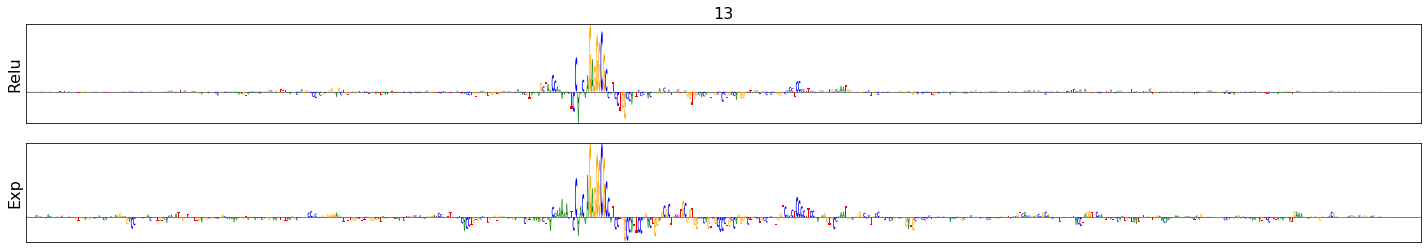

In [135]:
plot_range = range(150,450)
L = len(plot_range)
for index in range(len(scores)):

    fig = plt.figure(figsize=(25,4))

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[index,plot_range[l],a]

    ax = plt.subplot(2,1,1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Relu', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])
    plt.title(index, fontsize=16)

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores2[index,plot_range[l],a]

    ax = plt.subplot(2,1,2)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Exp', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])



In [38]:

from keras import backend as K
import tensorflow.compat.v1.keras.backend as K1

model_name = 'dilated_residualbind'
name = model_name+'_'+'relu'
weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)


labels = K.placeholder(dtype=tf.int32)
saliency = K1.gradients(model.layers[-1].output[:,labels], model.input)[0]
sess = K1.get_session()

attr_score = []
for i in range(len(X)):
    y = np.where(Y[i,:] == 1)[0]
    attr_score.append(sess.run(saliency, {model.inputs[0]: np.expand_dims(X[i], axis=0),
                                          labels: y[0]}))

scores =  np.concatenate(attr_score, axis=0)

In [39]:

name = model_name+'_'+'exponential'
weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

labels = K.placeholder(dtype=tf.int32)
saliency = K1.gradients(model.layers[-1].output[:,4], model.input)[0]
sess = K1.get_session()

attr_score = []
for i in range(len(X)):
    y = np.where(Y[i,:] == 1)[0]
    attr_score.append(sess.run(saliency, {model.inputs[0]: np.expand_dims(X[i], axis=0),
                                          labels: y[0]}))

scores2 =  np.concatenate(attr_score, axis=0)

In [40]:

plot_range = range(600)

scores *= X
scores2 *= X

scores = scores[:,plot_range,:]
scores2 = scores2[:,plot_range,:]

X = X[:,plot_range,:]
N, L, A = scores.shape

[<matplotlib.lines.Line2D at 0x7f716148d390>,
 <matplotlib.lines.Line2D at 0x7f716148d4e0>,
 <matplotlib.lines.Line2D at 0x7f716148d630>,
 <matplotlib.lines.Line2D at 0x7f716148d780>]

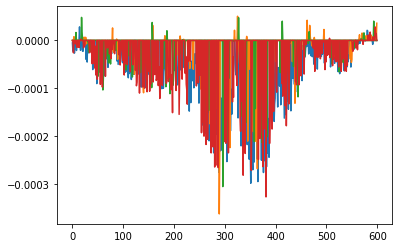

In [55]:

plt.plot(scores2[48])

In [56]:
index_all = []
for i, x in enumerate(X):
    if np.sum(x==0.25) == 0:
        index_all.append(i)
index_all

[0,
 8,
 20,
 30,
 31,
 33,
 38,
 39,
 41,
 45,
 47,
 48,
 49,
 60,
 69,
 72,
 73,
 75,
 77,
 78,
 81,
 87,
 95]

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


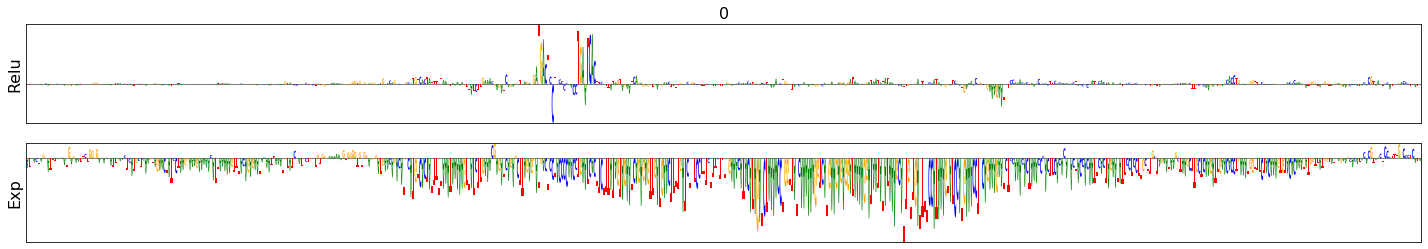

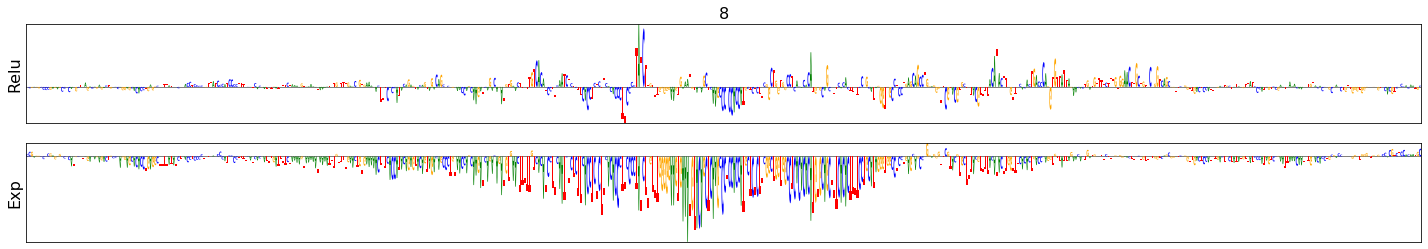

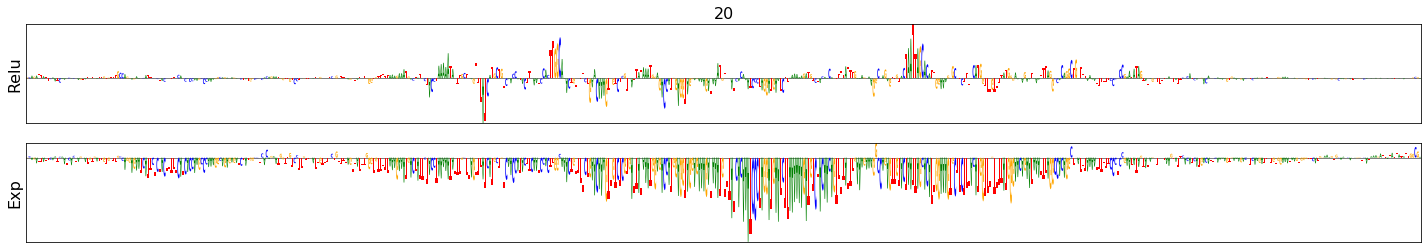

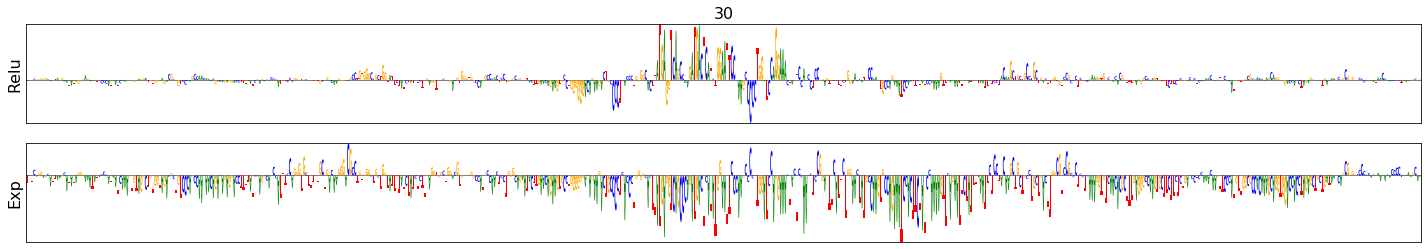

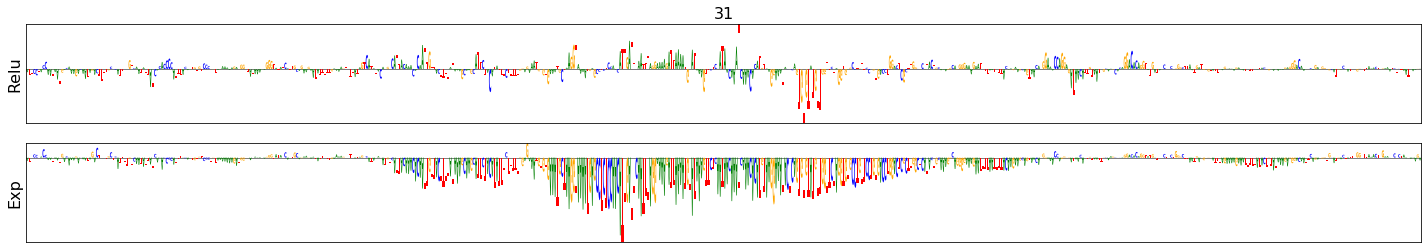

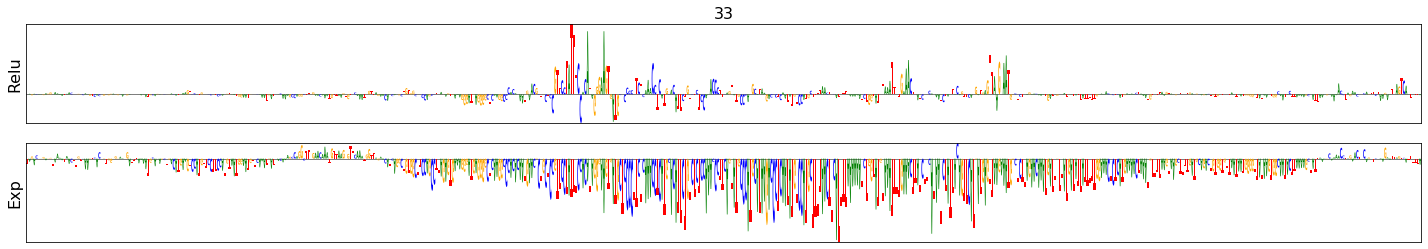

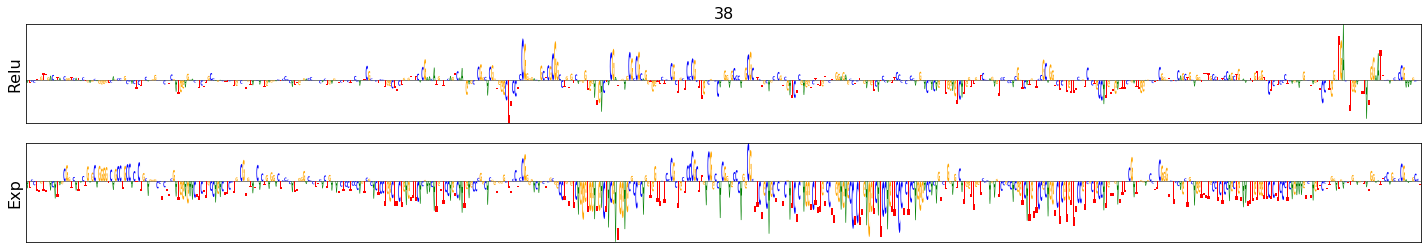

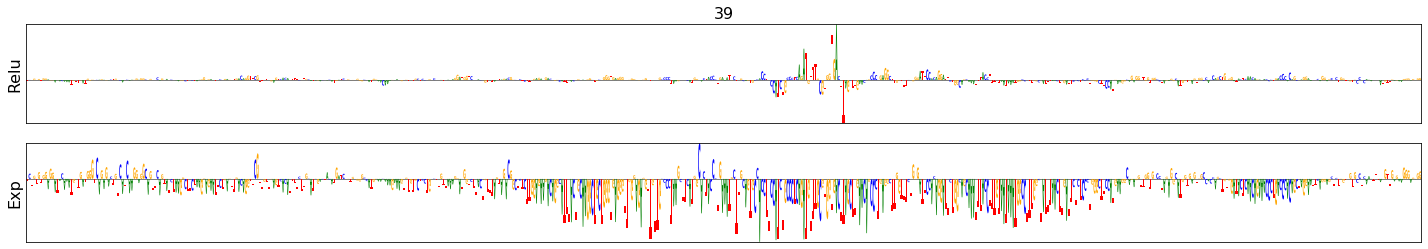

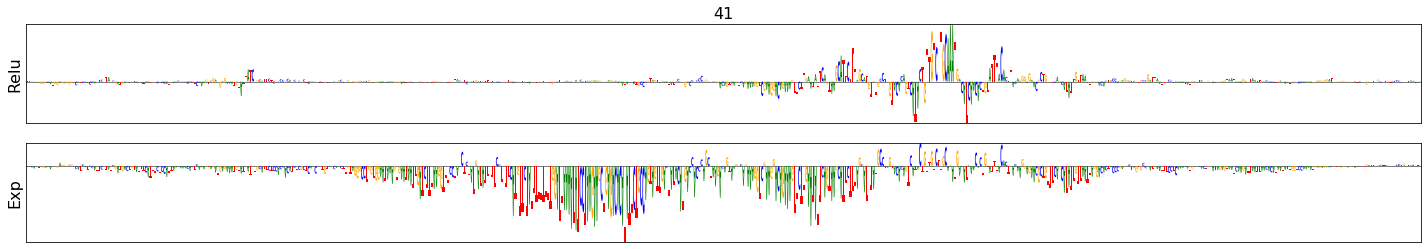

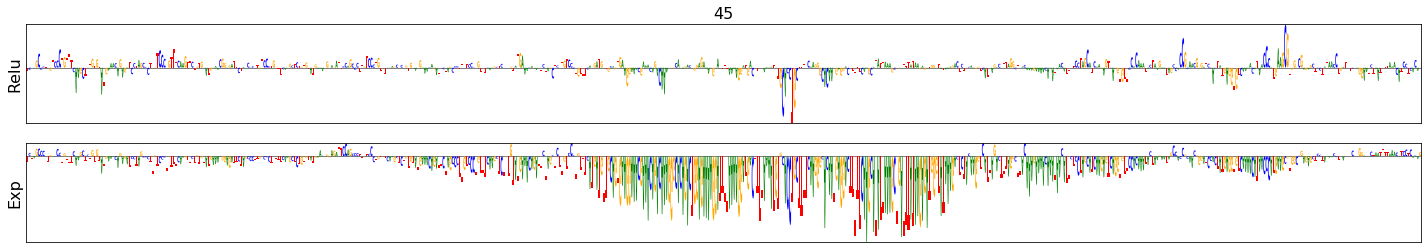

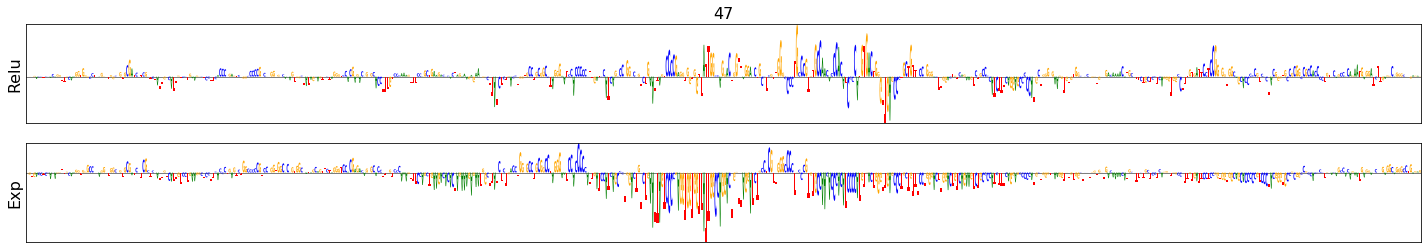

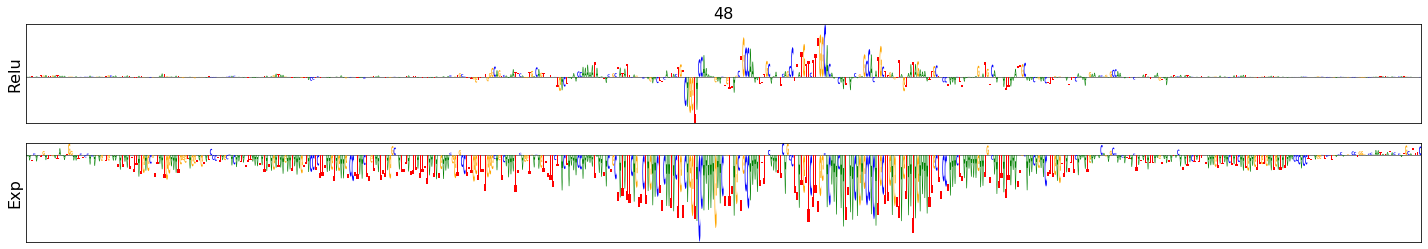

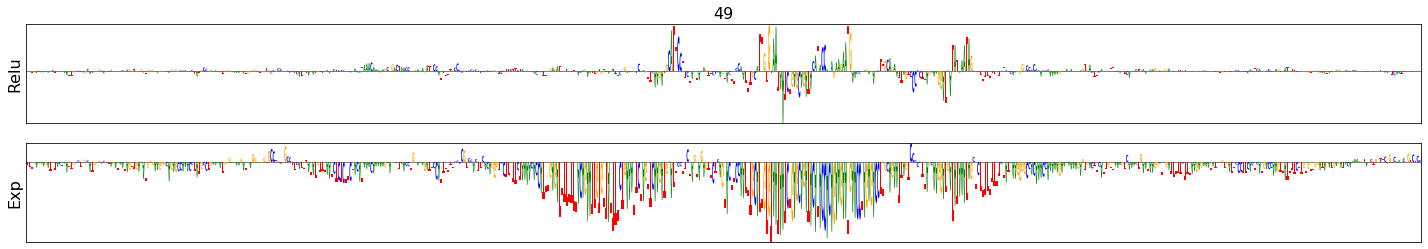

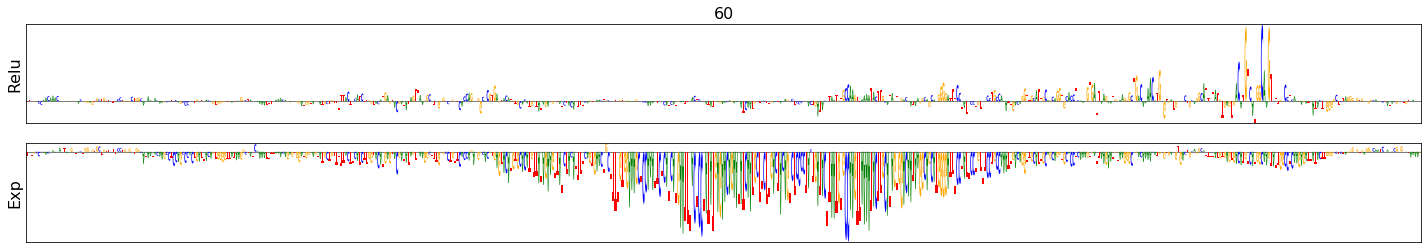

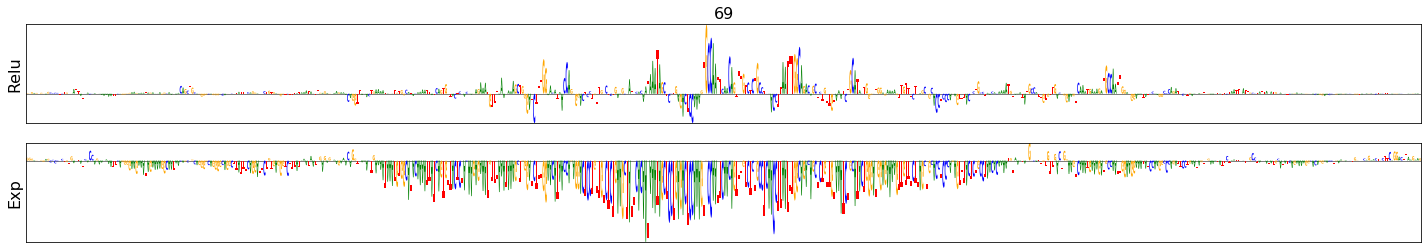

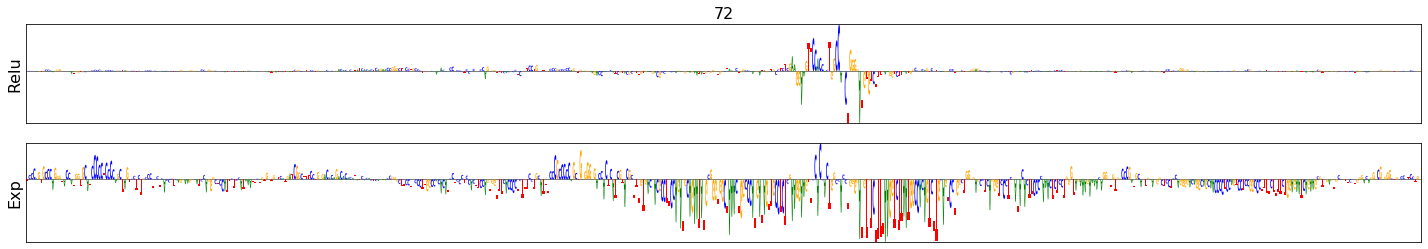

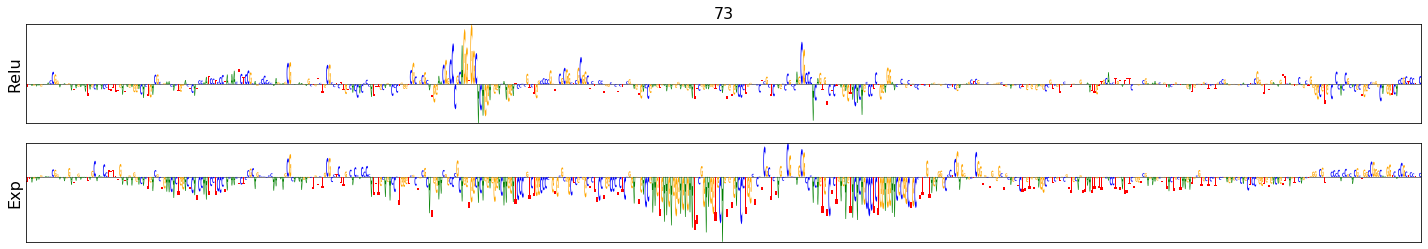

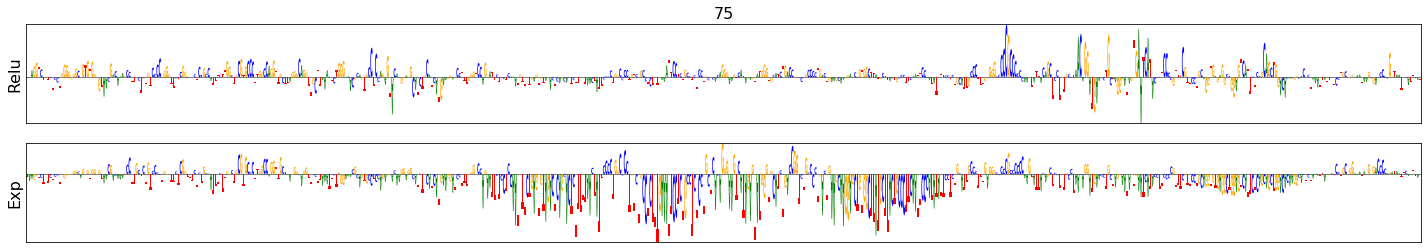

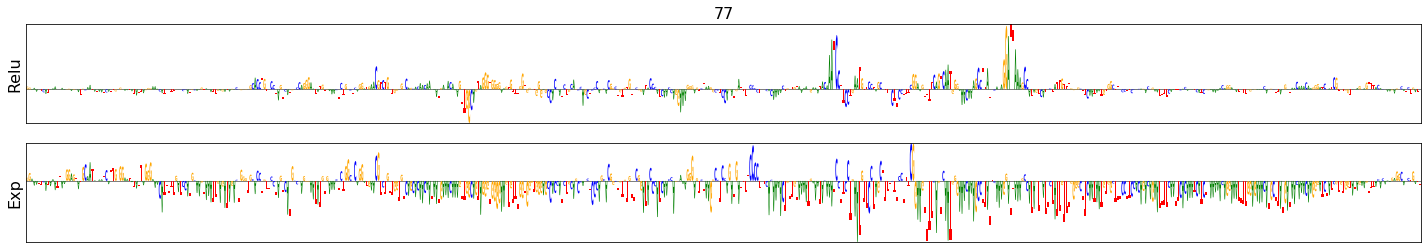

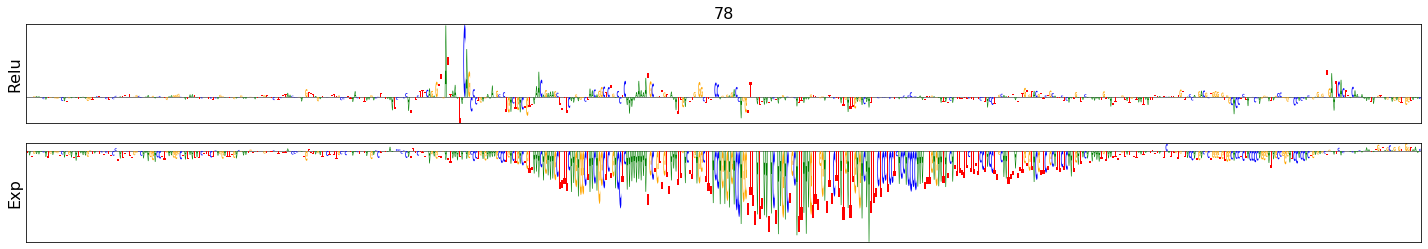

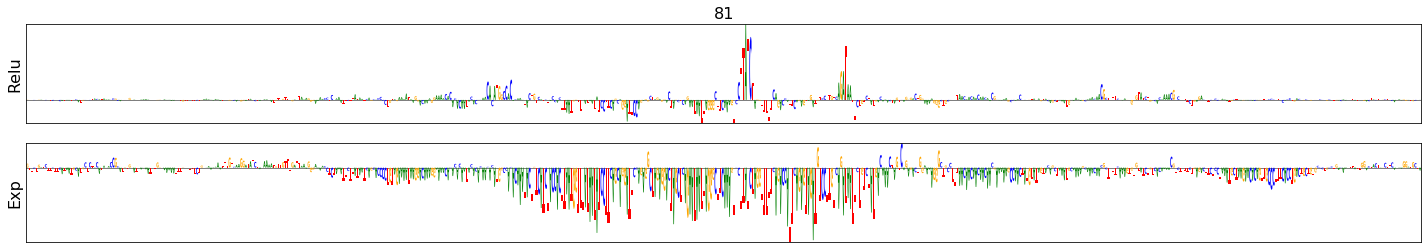

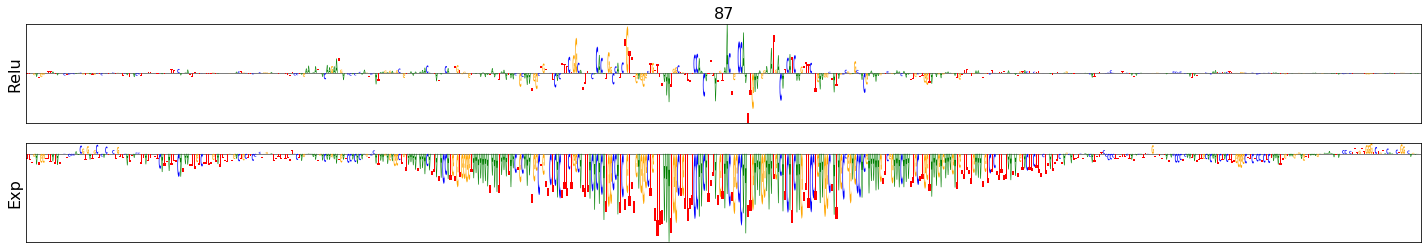

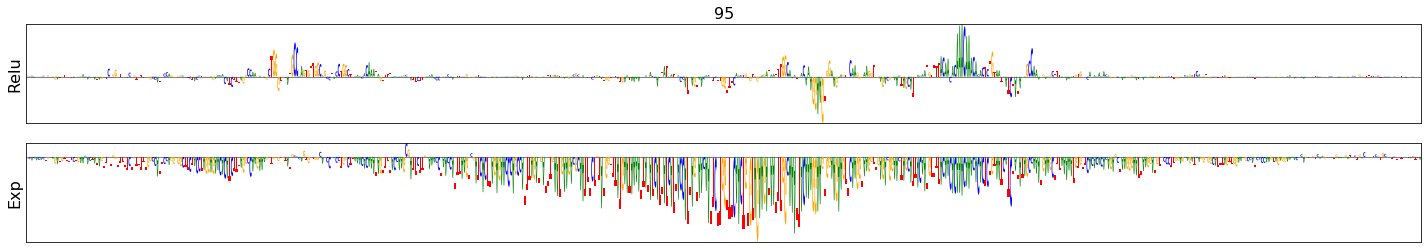

In [57]:

for index in index_all:

    fig = plt.figure(figsize=(25,4))

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[index,l,a]

    ax = plt.subplot(2,1,1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Relu', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])
    plt.title(index, fontsize=16)

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores2[index,l,a]

    ax = plt.subplot(2,1,2)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Exp', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])

